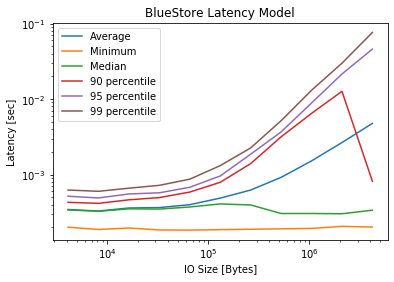

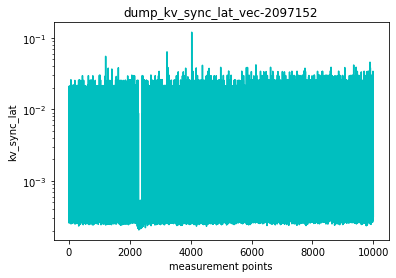

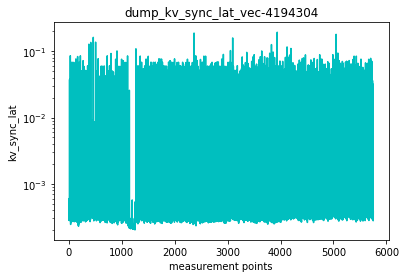

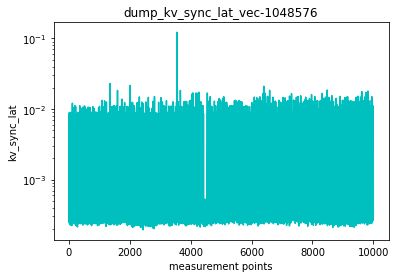

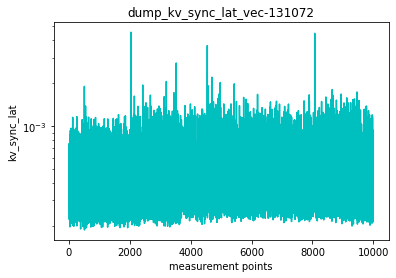

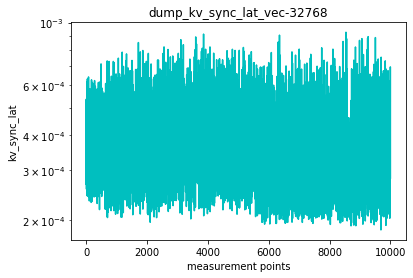

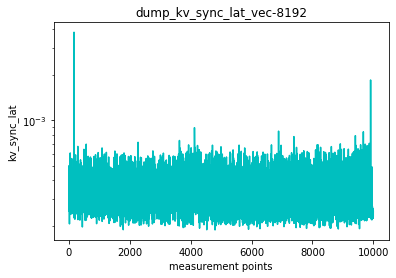

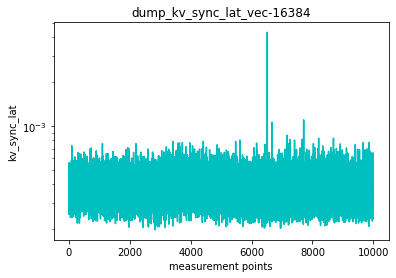

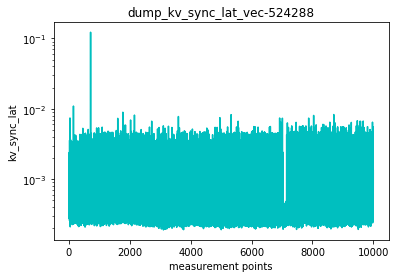

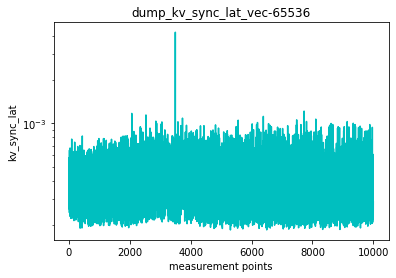

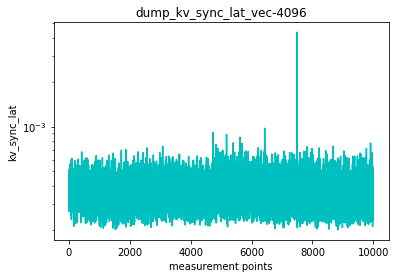

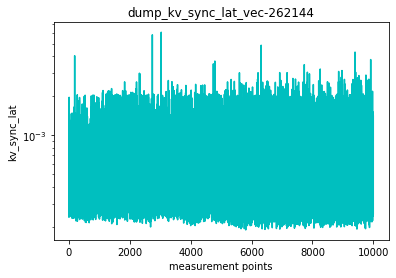

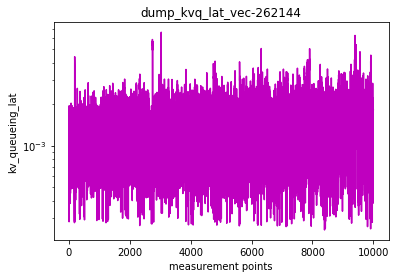

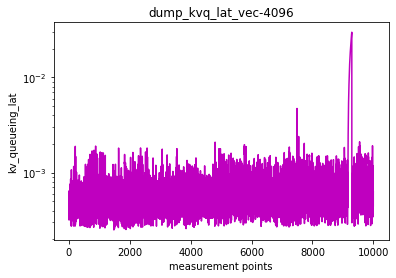

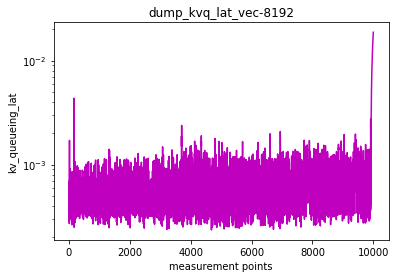

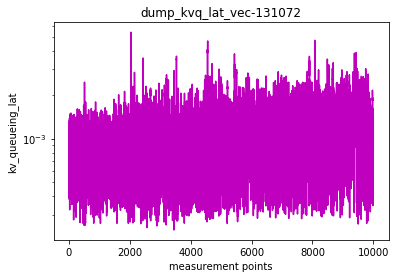

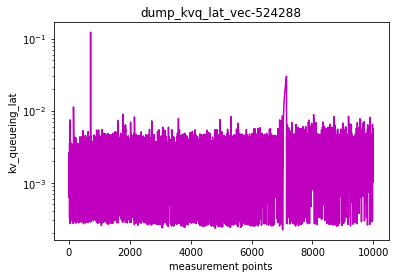

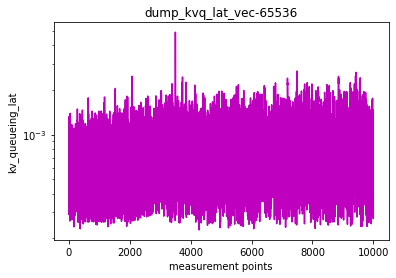

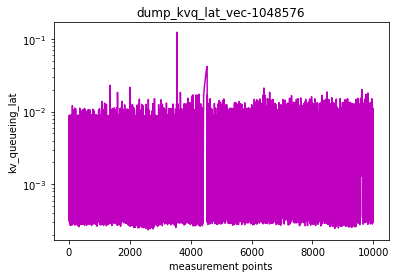

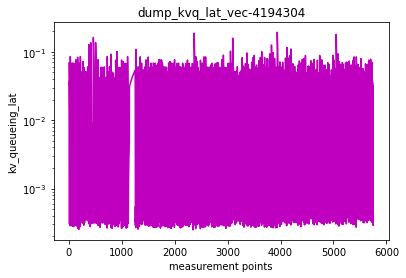

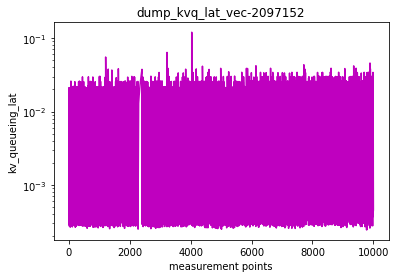

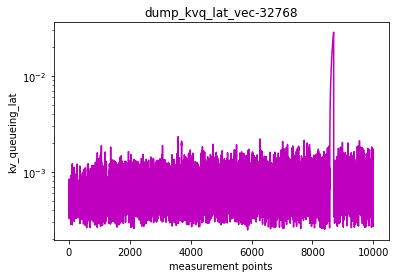

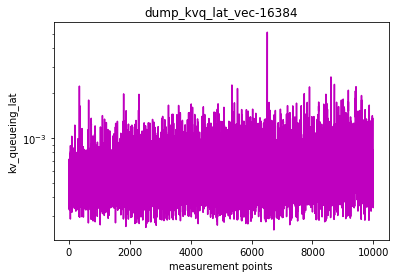

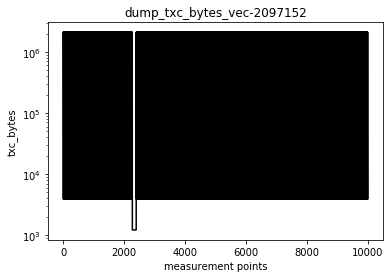

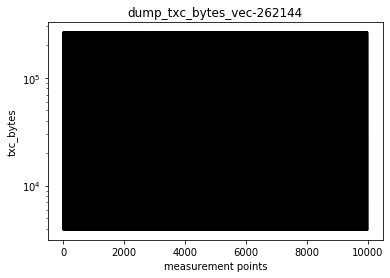

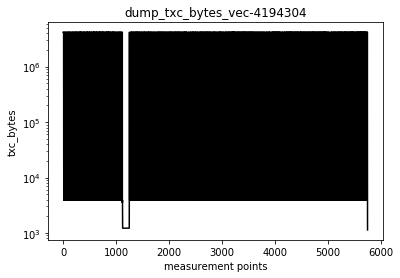

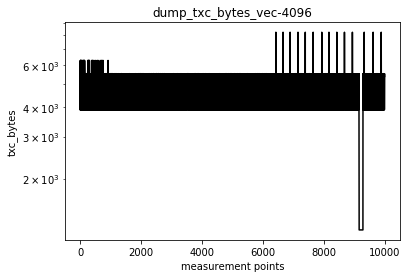

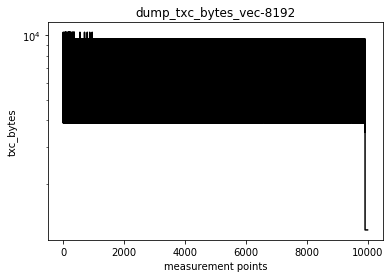

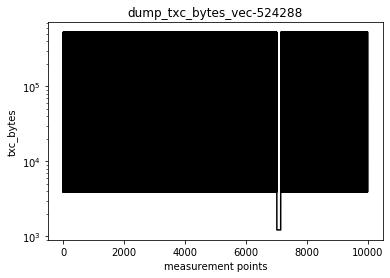

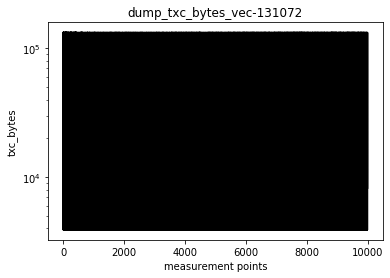

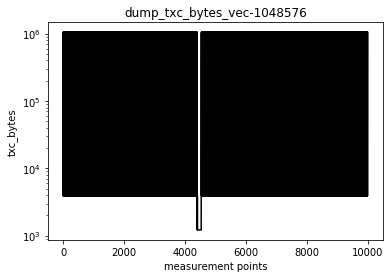

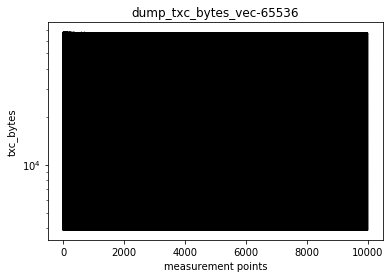

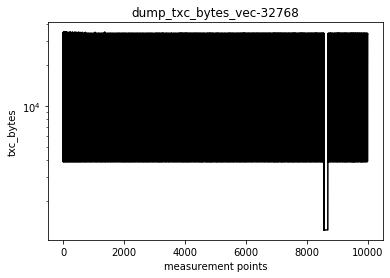

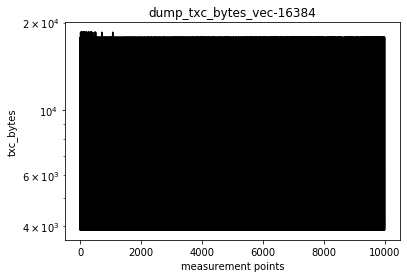

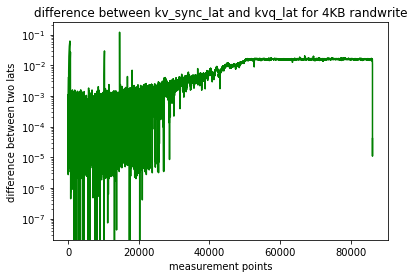

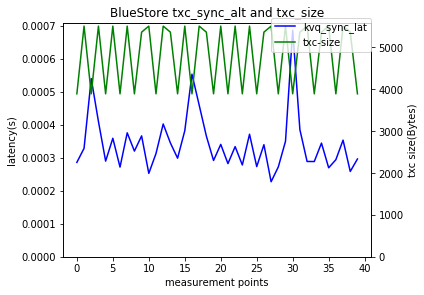

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from pandas import read_csv
import pandas as pd
import glob

# process raw data (these csvs are raw data)
# use (eg: nrows=50) to control how many data points are needed

# plot the BlueStore Latency Model
x = []
y_min = []
y_avg = []
y_med = []
y_p90 = []
y_p95 = []
y_p99 = []
for f in glob.glob('dump_kv_sync_lat_vec*.csv'):
    bs=f.split('-')[1].split('.')[0]
    x.append(int(bs))
x.sort()
for i in x:
    fname='dump_kv_sync_lat_vec-'+str(i)+'.csv'
    data1=read_csv(fname, header=0, skiprows=1000, nrows=10000, parse_dates=True, squeeze=True).sort_values(ignore_index=True)
    datalen=len(data1)
    avg = sum(data1) / len(data1)
    median = data1[int(.5 * datalen - 1)]
    pct90 = data1[int(.90 * datalen - 1)]
    pct95 = data1[int(.95 * datalen - 1)]
    pct99 = data1[int(.99 * datalen - 1)]
    y_min.append(data1[0])
    y_avg.append(avg)
    y_med.append(median)
    y_p90.append(pct90)
    y_p95.append(pct95)
    y_p99.append(pct99)
fig, ax = plt.subplots()
ax.set_xscale('log')
ax.set_yscale('log')
ax.plot(x, y_avg, label='Average')
ax.plot(x, y_min, label='Minimum')
ax.plot(x, y_med, label='Median')
ax.plot(x, y_p90, label='90 percentile')
ax.plot(x, y_p95, label='95 percentile')
ax.plot(x, y_p99, label='99 percentile')
ax.set(xlabel='IO Size [Bytes]', ylabel='Latency [sec]', title='BlueStore Latency Model')
plt.legend()
plt.show()
plt.close()

# plot kv_sync_lat in BlueStore(including flushing and committing latencies)
for f in glob.glob('dump_kv_sync_lat_vec*.csv'):
    data1 = read_csv(f, header=0, skiprows=1000, nrows=10000, parse_dates=True, squeeze=True)
    fig1 = plt.figure(1)
    ax1 = fig1.add_subplot(111)
    line1 = data1.plot(style='c-', label='kv_sync_lat')
    ax1.set_xlabel('measurement points')
    ax1.set_ylabel('kv_sync_lat')
    plt.yscale('log')
    ax1.set_title(f.split(".")[0])
    plt.show()
    figname=f.split(".")[0] + ".png"
    #plt.savefig(figname, bbox_inches='tight')
    plt.close()

# plot kvq_lat in BlueStore(including kv_queue queueing latency and kv_sync_lat)    
for f in glob.glob('dump_kvq_lat_vec*.csv'):
    data1 = read_csv(f, header=0, skiprows=1000, nrows=10000, parse_dates=True, squeeze=True)
    fig1 = plt.figure(1)
    ax1 = fig1.add_subplot(111)
    line1 = data1.plot(style='m-', label='kv_queueing_lat')
    ax1.set_xlabel('measurement points')
    ax1.set_ylabel('kv_queueing_lat')
    plt.yscale('log')
    ax1.set_title(f.split(".")[0])
    plt.show()
    figname=f.split(".")[0] + ".png"
    #plt.savefig(figname, bbox_inches='tight')
    plt.close()

# plot txc size over time in BlueStore
for f in glob.glob('dump_txc_bytes_vec*.csv'):
    data1 = read_csv(f, header=0, skiprows=1000, nrows=10000, parse_dates=True, squeeze=True)
    fig1 = plt.figure(1)
    ax1 = fig1.add_subplot(111)
    line1 = data1.plot(style='k-', label='txc_bytes')
    ax1.set_xlabel('measurement points')
    ax1.set_ylabel('txc_bytes')
    ax1.set_title(f.split(".")[0])
    plt.yscale('log')
    plt.show()
    figname=f.split(".")[0] + ".png"
    plt.savefig(figname, bbox_inches='tight')
    plt.close()

# verify the latency in BlueStore for 4KB
data1 = read_csv('dump_kvq_lat_vec-4096.csv', header=0, skiprows=1, parse_dates=True, squeeze=True)
data2 = read_csv('dump_kv_sync_lat_vec-4096.csv', header=0, skiprows=1, parse_dates=True, squeeze=True)
temp = data1 - data2
fig1 = plt.figure(1)
ax1 = fig1.add_subplot(111)
line1 = temp.plot(style='g-', label='difference between two lats')
ax1.set_xlabel('measurement points')
ax1.set_ylabel('difference between two lats')
ax1.set_title('difference between kv_sync_lat and kvq_lat for 4KB randwrite')
plt.yscale('log')
plt.show()
plt.savefig('difference-between-kv_sync_lat-and-kvq_lat.png', bbox_inches='tight')
plt.close()

series1 = read_csv('dump_kv_sync_lat_vec-4096.csv', header=0, skiprows=10000, nrows=40, parse_dates=True, squeeze=True)
series2 = read_csv('dump_txc_bytes_vec-4096.csv', header=0, skiprows=10000, nrows=40, parse_dates=True, squeeze=True)
fig3 = plt.figure(3)
ax1 = fig3.add_subplot(111)
line1 = series1.plot(style='b-', label='kvq_sync_lat')
ax1.set_xlabel('measurement points')
ax1.set_ylabel('latency(s)')
ax1.set_ylim(0)
ax2 = ax1.twinx()
line2 = series2.plot(style='g-', label='txc-size')
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
ax2.set_ylabel('txc size(Bytes)')
ax2.set_ylim(0)
fig3.tight_layout()
fig3.legend(loc='upper right', bbox_to_anchor=(0.87, 0.98))
plt.title("BlueStore txc_sync_alt and txc_size", y=1.02)
plt.show()
fig3.savefig("dump-txc-lat-n-size.png", bbox_inches='tight')
plt.close()